<a href="https://colab.research.google.com/github/ZintleFaltein/Covid-modelling/blob/Rachel/Covid_Modelling_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid- 19  Modelling



In [ ]:
#import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lockdown = pd.read_csv(
     'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/lockdown/covid19za_provincial_cumulative_timeline_lockdown.csv')
confirmed = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv')
recovered = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_recoveries.csv')
deaths = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_deaths.csv')
transmission = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_transmission_type.csv')
tests = pd.read_csv(
    'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_provincial_cumulative_timeline_testing.csv')

In [ ]:
lockdown

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,source
0,27-03-2020,20200327,5,5,5,5,5,5,5,5,5,https://businesstech.co.za/news/government/383...
1,01-05-2020,20200501,4,4,4,4,4,4,4,4,4,https://city-press.news24.com/News/level-4-loc...
2,01-06-2020,20200601,3,3,3,3,3,3,3,3,3,https://www.iol.co.za/news/politics/level-3-lo...


In [ ]:
confirmed.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,05-03-2020,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,07-03-2020,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN
2,08-03-2020,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN
3,09-03-2020,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN
4,11-03-2020,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13,NaN


In [ ]:
confirmed.drop('UNKNOWN',axis=1,inplace=True)
confirmed.head(1)

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,total,source
0,05-03-2020,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN


In [ ]:
recovered.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,17-04-2020,20200417,9,71,479,96,18,9,10,6,205,0,903,https://twitter.com/nicd_sa/status/12512151947...
1,18-04-2020,20200418,9,71,479,96,18,9,10,6,205,0,903,https://twitter.com/nicd_sa/status/12515952235...
2,19-04-2020,20200419,9,71,479,96,18,9,10,6,205,0,903,https://twitter.com/nicd_sa/status/12519270552...
3,20-04-2020,20200420,15,74,545,151,21,14,13,6,216,0,1055,https://twitter.com/nicd_sa/status/12523098244...
4,21-04-2020,20200421,15,74,545,151,21,14,13,6,216,0,1055,https://twitter.com/nicd_sa/status/12526435556...


In [ ]:
recovered.drop('UNKNOWN',axis=1,inplace=True)
recovered.head(1)

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,total,source
0,17-04-2020,20200417,9,71,479,96,18,9,10,6,205,903,https://twitter.com/nicd_sa/status/12512151947...


In [ ]:
transmission.head()

,case_id,transmission_type,type,countries
0,1,Travelled to Italy,travel,italy
1,2,Travelled to Italy,travel,italy
2,3,Travelled to Italy,travel,italy
3,4,Travelled to Italy,travel,italy
4,5,Travelled to Italy,travel,italy


In [ ]:
transmission = transmission.drop('Unnamed: 4',axis=1)
transmission.head(1)

,case_id,transmission_type,type,countries
0,1,Travelled to Italy,travel,italy


In [ ]:
deaths.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,27-03-2020,20200327,0,0,0,0,0,0,0,0,1,0,1,https://sacoronavirus.co.za/2020/03/27/latest-...
1,28-03-2020,20200328,0,0,0,1,0,0,0,0,1,0,2,NaN
2,30-03-2020,20200330,0,1,0,1,0,0,0,0,1,0,3,NaN
3,31-03-2020,20200331,0,1,1,2,0,0,0,0,1,0,5,NaN
4,03-04-2020,20200403,0,1,1,6,0,0,0,0,1,0,9,NaN


In [ ]:
deaths.drop('UNKNOWN',axis=1,inplace=True)
deaths.head(1)

,case_id,transmission_type,type,countries
0,1,Travelled to Italy,travel,italy


In [ ]:
tests.head()

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,27-04-2020,20200427,14054,6317,61830,28265,3691,4385,1314,2544,33335,12908,168643,ministerial briefing 26-04-2020
1,03-05-2020,20200503,24835,12634,85134,45955,5626,6691,1951,3565,53967,17183,257541,https://www.nicd.ac.za/wp-content/uploads/2020...
2,09-05-2020,20200509,34032,17231,111630,61801,7783,9823,3092,5213,70038,20693,341336,https://www.nicd.ac.za/wp-content/uploads/2020...
3,13-05-2020,20200513,38122,19265,127030,67853,8239,11414,3683,5812,82865,22069,386352,https://twitter.com/bandilemasuku/status/12609...
4,20-05-2020,20200520,51888,24415,166394,86448,10579,14964,4776,8830,112612,25955,506681,https://twitter.com/GautengProvince/status/126...


In [ ]:
tests.drop('UNKNOWN',axis=1,inplace=True)
tests.head(1)

,date,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,total,source
0,27-04-2020,20200427,14054,6317,61830,28265,3691,4385,1314,2544,33335,168643,ministerial briefing 26-04-2020


In [ ]:
!pip install "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy"

In [ ]:
import covsirphy as cs
cs.get_version()

'CovsirPhy v2.8.1'

In [132]:
dataset = confirmed.merge(tests,how='left',on='date')
dataset.head()

,date,YYYYMMDD_x,EC_x,FS_x,GP_x,KZN_x,LP_x,MP_x,NC_x,NW_x,WC_x,UNKNOWN,total_x,source_x,YYYYMMDD_y,EC_y,FS_y,GP_y,KZN_y,LP_y,MP_y,NC_y,NW_y,WC_y,total_y,source_y
0,05-03-2020,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07-03-2020,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-03-2020,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09-03-2020,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-03-2020,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
dataset= dataset.fillna(0)

In [137]:
data = pd.concat([dataset['date'],dataset['total_x'],dataset['total_y']],axis=1)
data.head(3)

,date,total_x,total_y
0,05-03-2020,1,0.0
1,07-03-2020,2,0.0
2,08-03-2020,3,0.0


In [138]:
data = data.rename(columns={'total_x': 'confirmed', 'total_y': 'tested'})
data.head(1)

,date,confirmed,tested
0,05-03-2020,1,0.0


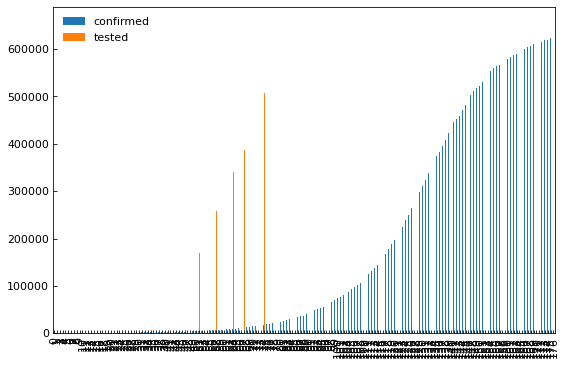

In [139]:
plt.hist
plt.show()


In [122]:
df1 = confirmed.merge(recoveries,how='left',on='date')

In [123]:
df1

,date,YYYYMMDD_x,EC_x,FS_x,GP_x,KZN_x,LP_x,MP_x,NC_x,NW_x,WC_x,UNKNOWN_x,total_x,source_x,YYYYMMDD_y,EC_y,FS_y,GP_y,KZN_y,LP_y,MP_y,NC_y,NW_y,WC_y,UNKNOWN_y,total_y,source_y
0,05-03-2020,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07-03-2020,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-03-2020,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09-03-2020,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-03-2020,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,26-08-2020,20200826,85472.0,35980.0,207610.0,111096.0,12795.0,23555.0,9500.0,24646.0,104997.0,50.0,615701,https://twitter.com/nicd_sa/status/12987029468...,20200826.0,80614.0,22740.0,176513.0,93814.0,11580.0,21370.0,6409.0,17702.0,94500.0,0.0,525242.0,https://twitter.com/nicd_sa/status/12987029468...
173,27-08-2020,20200827,85625.0,36419.0,208156.0,111585.0,12867.0,23677.0,9829.0,24805.0,105273.0,50.0,618286,https://twitter.com/nicd_sa/status/12990610006...,20200827.0,81373.0,22829.0,178479.0,94680.0,11639.0,21591.0,6640.0,17993.0,96114.0,0.0,531338.0,https://twitter.com/nicd_sa/status/12990610006...
174,28-08-2020,20200828,85701.0,36742.0,208579.0,111863.0,12960.0,23765.0,10043.0,24922.0,105507.0,50.0,620123,https://twitter.com/nicd_sa/status/12994458373...,20200828.0,81373.0,23031.0,179631.0,95011.0,11832.0,21994.0,6784.0,18165.0,96114.0,0.0,533935.0,https://twitter.com/nicd_sa/status/12994458373...
175,29-08-2020,20200829,85899.0,37157.0,209123.0,112291.0,13039.0,23946.0,10284.0,25086.0,105676.0,50.0,622551,https://sacoronavirus.co.za/2020/08/29/update-...,20200829.0,81373.0,23047.0,180345.0,95432.0,11961.0,22291.0,6887.0,18437.0,96921.0,0.0,536694.0,https://sacoronavirus.co.za/2020/08/29/update-...


In [129]:
df2 = pd.concat([df1['date'],df1['total_x'],df1['total_y']],axis=1)

In [130]:
df2

,date,total_x,total_y
0,05-03-2020,1,NaN
1,07-03-2020,2,NaN
2,08-03-2020,3,NaN
3,09-03-2020,7,NaN
4,11-03-2020,13,NaN
...,...,...,...
172,26-08-2020,615701,525242.0
173,27-08-2020,618286,531338.0
174,28-08-2020,620123,533935.0
175,29-08-2020,622551,536694.0


In [ ]:
df3 = df2.merge(deaths,how='left',on='date')
df3

,date,total_x,total_y,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
0,05-03-2020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07-03-2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-03-2020,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09-03-2020,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-03-2020,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,26-08-2020,615701,525242.0,20200826.0,2828.0,567.0,3395.0,2054.0,179.0,312.0,120.0,224.0,3823.0,0.0,13502.0,https://twitter.com/nicd_sa/status/12987029468...
173,27-08-2020,618286,531338.0,20200827.0,2853.0,567.0,3428.0,2102.0,179.0,312.0,120.0,224.0,3843.0,0.0,13628.0,https://twitter.com/nicd_sa/status/12990610006...
174,28-08-2020,620123,533935.0,20200828.0,2863.0,567.0,3475.0,2116.0,179.0,330.0,120.0,240.0,3853.0,0.0,13743.0,https://twitter.com/nicd_sa/status/12994458373...
175,29-08-2020,622551,536694.0,20200829.0,2869.0,690.0,3556.0,2135.0,179.0,330.0,120.0,240.0,3862.0,0.0,13981.0,https://sacoronavirus.co.za/2020/08/29/update-...


In [ ]:
total_df =   pd.concat([df3['date'], df3['total_x'],df3['total_y'],df3['total']],axis=1)

In [ ]:
total_df

,date,total_x,total_y,total
0,05-03-2020,1,NaN,NaN
1,07-03-2020,2,NaN,NaN
2,08-03-2020,3,NaN,NaN
3,09-03-2020,7,NaN,NaN
4,11-03-2020,13,NaN,NaN
...,...,...,...,...
172,26-08-2020,615701,525242.0,13502.0
173,27-08-2020,618286,531338.0,13628.0
174,28-08-2020,620123,533935.0,13743.0
175,29-08-2020,622551,536694.0,13981.0


In [ ]:
total_df = total_df.rename(columns={'total_x': 'confirmed_cases', 'total_y': 'recoveries', 'total': 'deaths'})

In [ ]:
total_df.head()

,date,confirmed_cases,recoveries,deaths
0,05-03-2020,1,NaN,NaN
1,07-03-2020,2,NaN,NaN
2,08-03-2020,3,NaN,NaN
3,09-03-2020,7,NaN,NaN
4,11-03-2020,13,NaN,NaN


In [ ]:
total_df = total_df.fillna(0)
total_df.head()

,date,confirmed_cases,recoveries,deaths
0,05-03-2020,1,0.0,0.0
1,07-03-2020,2,0.0,0.0
2,08-03-2020,3,0.0,0.0
3,09-03-2020,7,0.0,0.0
4,11-03-2020,13,0.0,0.0


In [ ]:
total_df.tail()

,date,confirmed_cases,recoveries,deaths
172,2020-08-26,615701,525242.0,13502.0
173,2020-08-27,618286,531338.0,13628.0
174,2020-08-28,620123,533935.0,13743.0
175,2020-08-29,622551,536694.0,13981.0
176,2020-08-30,625056,538604.0,14028.0


In [ ]:
# convert date column from string to datetime
total_df['date'] = pd.to_datetime(total_df['date'], format='%d-%m-%Y')

In [ ]:
total_df['Active_cases'] = total_df['confirmed_cases'] - total_df['recoveries'] - total_df['deaths']

In [ ]:
total_df['recovered/confirmed'] = (total_df['recoveries']/total_df['confirmed_cases'])
total_df['death/confirmed'] = (total_df['deaths']/total_df['confirmed_cases'])

In [ ]:
total_df.head()

,date,confirmed_cases,recoveries,deaths,Active_cases,recovered/confirmed,death/confirmed
0,2020-03-05,1,0.0,0.0,1.0,0.0,0.0
1,2020-03-07,2,0.0,0.0,2.0,0.0,0.0
2,2020-03-08,3,0.0,0.0,3.0,0.0,0.0
3,2020-03-09,7,0.0,0.0,7.0,0.0,0.0
4,2020-03-11,13,0.0,0.0,13.0,0.0,0.0


In [ ]:
total_df.tail()

,date,confirmed_cases,recoveries,deaths,Active_cases,recovered/confirmed,death/confirmed
172,2020-08-26,615701,525242.0,13502.0,76957.0,0.853080,0.021929
173,2020-08-27,618286,531338.0,13628.0,73320.0,0.859373,0.022042
174,2020-08-28,620123,533935.0,13743.0,72445.0,0.861015,0.022162
175,2020-08-29,622551,536694.0,13981.0,71876.0,0.862088,0.022458
176,2020-08-30,625056,538604.0,14028.0,72424.0,0.861689,0.022443


In [ ]:
data_cols = ['confirmed_cases',
                         'recoveries', 
                                   'deaths',
             'Active_cases']


rate_cols = ["recovered/confirmed", "death/confirmed"]

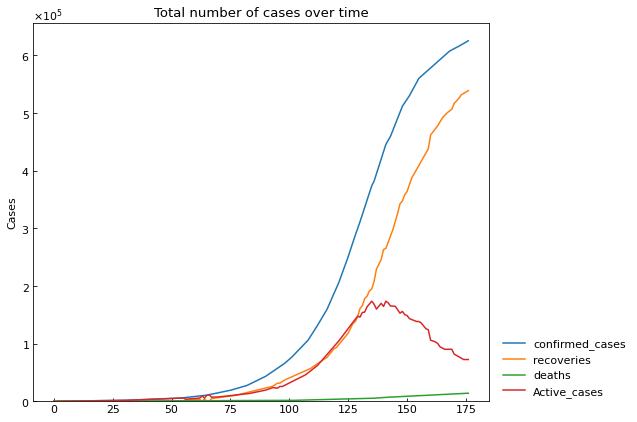

In [ ]:
cs.line_plot(total_df[data_cols], "Total number of cases over time")

In [ ]:
cases = total_df.drop(['date','recoveries','deaths'],axis=1)
cases

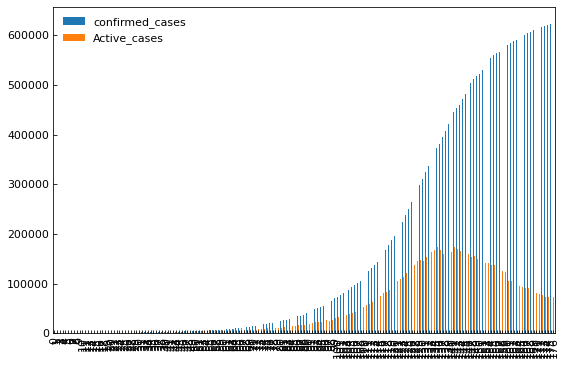

In [ ]:
cases.plot(kind='bar')
plt.show()

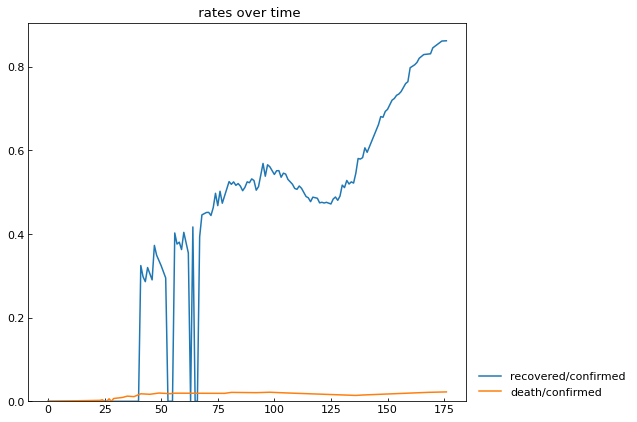

In [ ]:
cs.line_plot(total_df[rate_cols], " rates over time", ylabel="", math_scale=False)

Text(0.5, 1.0, 'Types of Transmission')

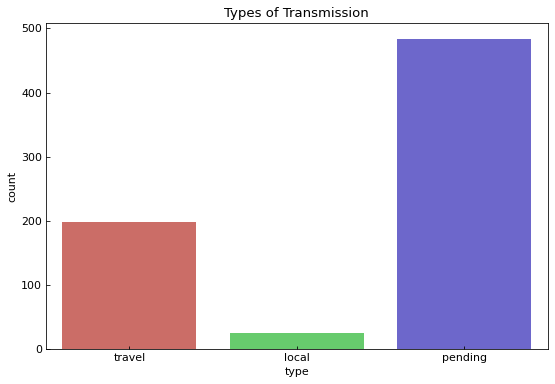

In [ ]:

sns.countplot(x='type', data=transmission, palette="hls")
plt.title("Types of Transmission")